In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./archive/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().values.any()

False

In [9]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df = df.replace('?', np.NaN)

In [11]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

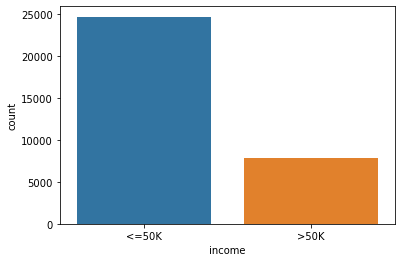

In [15]:
sns.countplot(x='income', data = df)

<AxesSubplot:xlabel='income', ylabel='age'>

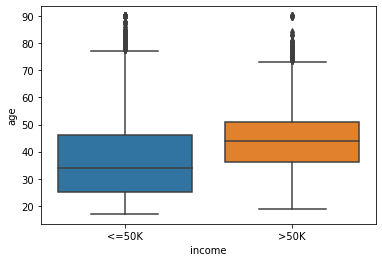

In [16]:
sns.boxplot(y='age',x='income',data=df)

<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

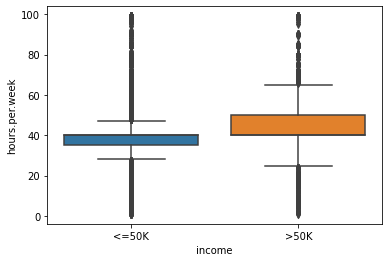

In [17]:
sns.boxplot(y='hours.per.week',x='income',data=df)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

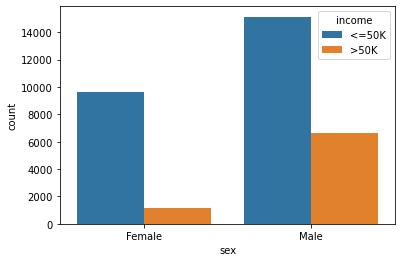

In [18]:
sns.countplot(df['sex'],hue=df['income'])

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Prof-specialty'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Machine-op-inspct'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Handlers-cleaners'),
  Text(8, 0, 'Sales'),
  Text(9, 0, 'Farming-fishing'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

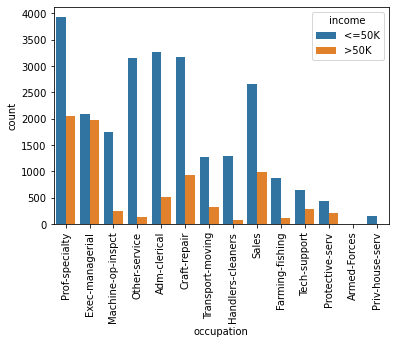

In [19]:
sns.countplot(df['occupation'],hue=df['income'])
plt.xticks(rotation=90)

In [20]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<AxesSubplot:xlabel='education.num', ylabel='income'>

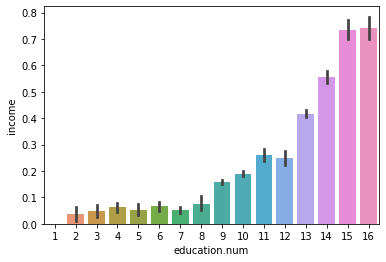

In [21]:
sns.barplot(x="education.num",y="income",data=df)

In [22]:
df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Federal-gov'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Local-gov'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

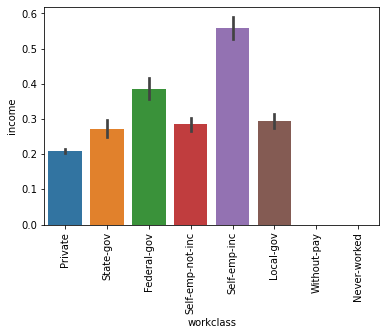

In [23]:
sns.barplot(x="workclass",y="income",data=df)
plt.xticks(rotation=90)

In [24]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

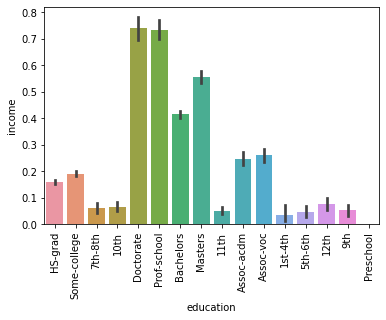

In [25]:
sns.barplot(x="education",y="income",data=df)
plt.xticks(rotation=90)

In [26]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Widowed'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Married-civ-spouse'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

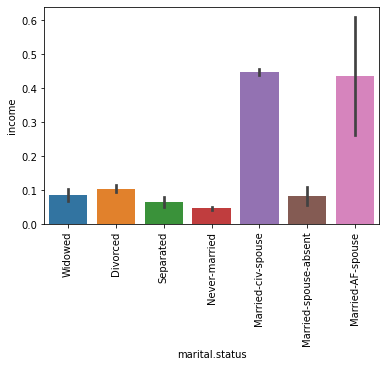

In [27]:
sns.barplot(x="marital.status",y="income",data=df)
plt.xticks(rotation=90)

In [28]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Unmarried'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Other-relative'),
  Text(4, 0, 'Husband'),
  Text(5, 0, 'Wife')])

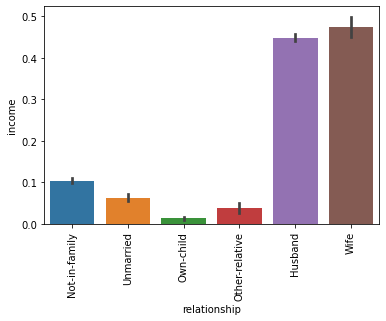

In [29]:
sns.barplot(x="relationship",y="income",data=df)
plt.xticks(rotation=90)

In [30]:
df['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [33]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

In [34]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<AxesSubplot:>

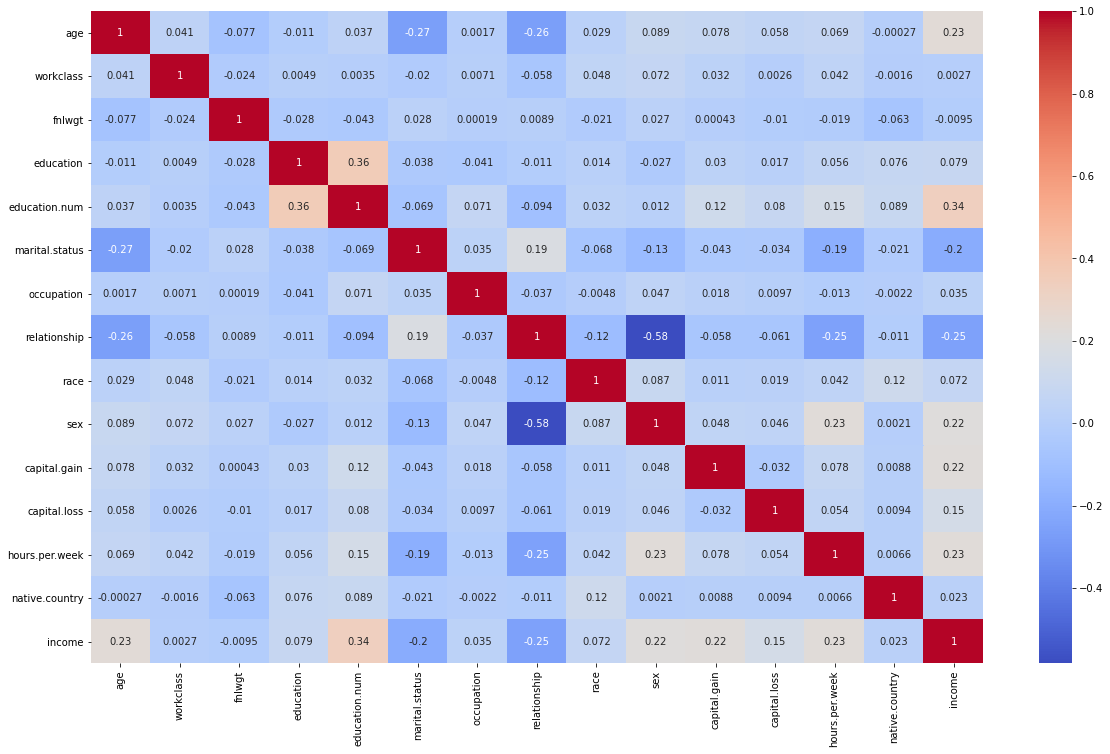

In [35]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [36]:
corrmat['income'].sort_values(ascending = False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native.country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

In [37]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [40]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.429109,-0.090519,0.961944,0.183680,-0.420040,-0.399781,-1.037229,-0.898708,0.394740,0.703666,-0.146469,-0.217215,-0.046384,0.260611
1,1.723529,-0.090519,-0.761973,1.215014,-0.032023,1.592598,1.221516,1.585101,0.394740,-1.421129,-0.146469,3.782536,-0.611341,0.260611
2,-0.411015,-0.090519,-0.499149,-0.331987,1.132030,-0.399781,-0.033342,-0.898708,-0.779485,0.703666,-0.146469,-0.217215,-0.046384,-4.975619
3,-1.073459,-0.090519,-0.682968,-0.847654,0.744013,0.928472,1.221516,0.964149,0.394740,0.703666,-0.146469,-0.217215,-1.660545,0.260611
4,2.091553,1.708176,2.301181,0.183680,-0.420040,-0.399781,-1.539173,2.206053,0.394740,-1.421129,-0.146469,-0.217215,-3.113290,0.260611


In [41]:
l=[]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)


Logistic Regression: 82.57754120176067


In [46]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
#y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Logistic Regression: 82.57754120176067
[[7011  418]
 [1284 1056]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7429
           1       0.72      0.45      0.55      2340

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

